In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
import streamlit as st

In [2]:

# Load dataset
file_path = 'C:\\Users\\LAdmin\\Desktop\\uni\\ML\\bank\\bank-full.csv'
data = pd.read_csv(file_path, sep=',')

In [3]:
# Data Inspection
display(data.head())
display(data.describe())
display(data.isnull().sum())


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Figure size 1000x600 with 0 Axes>

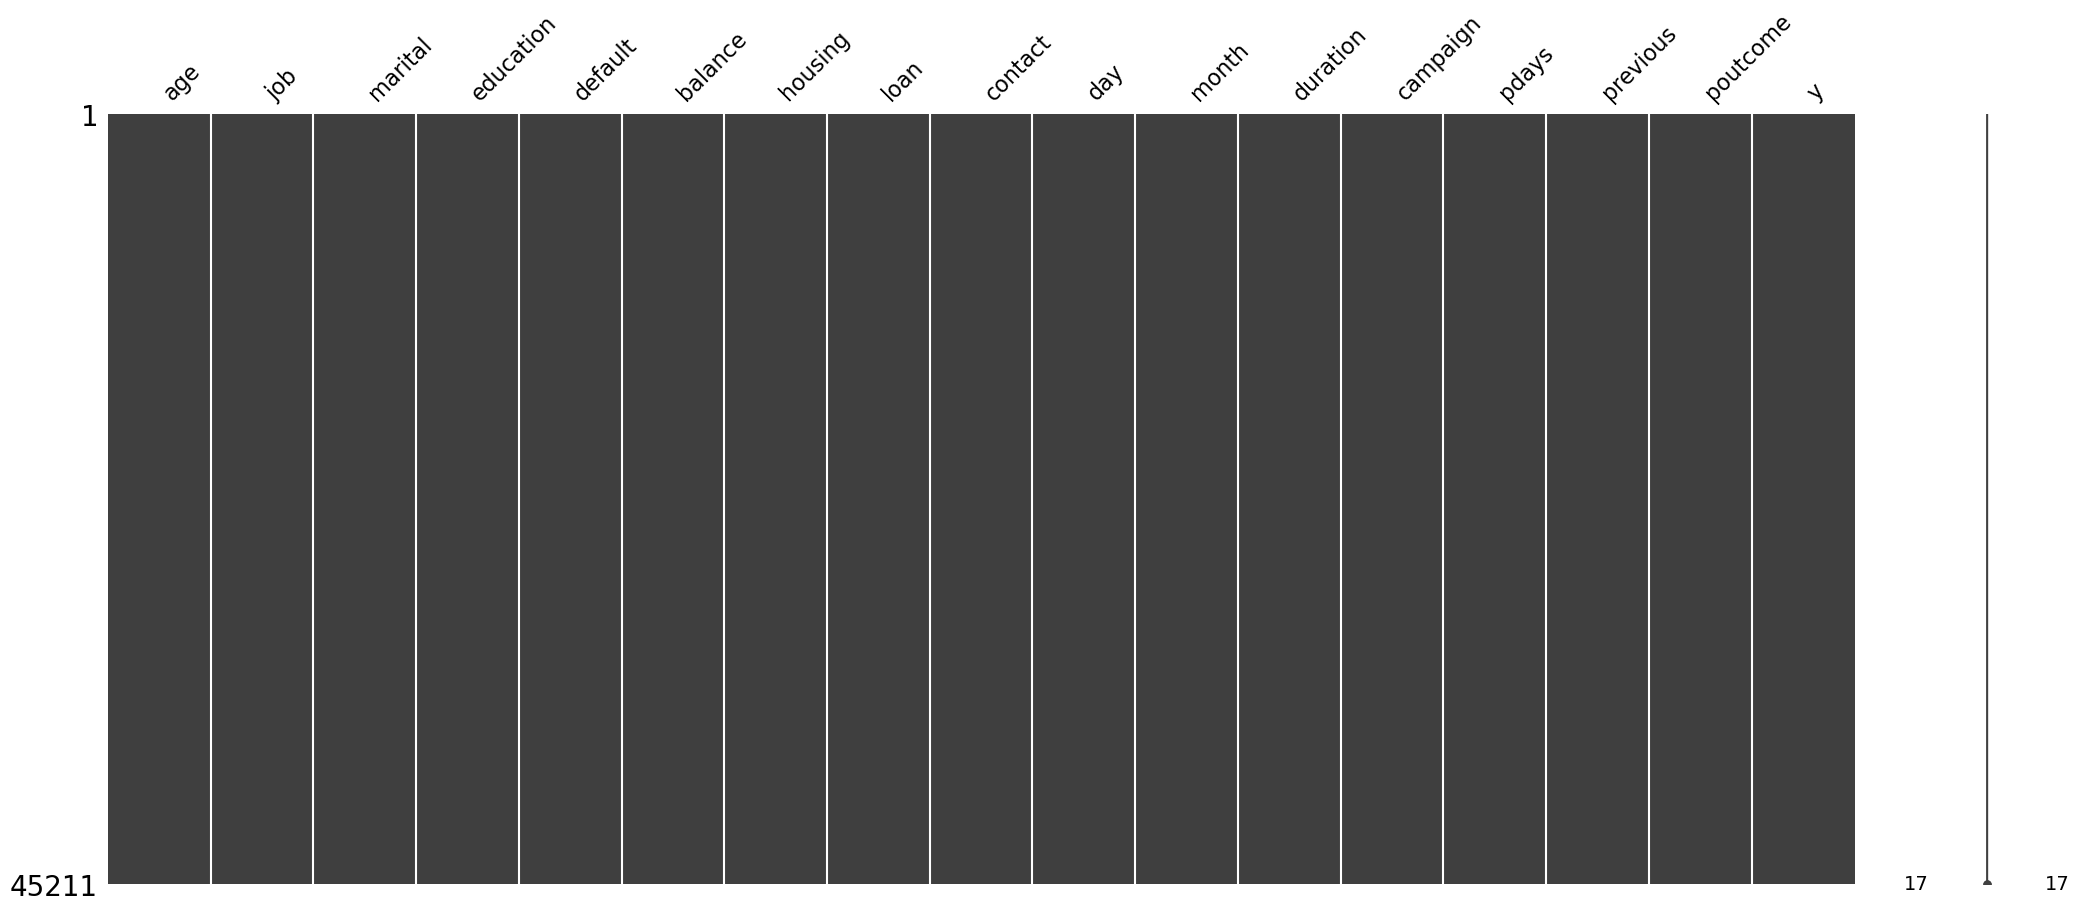

In [4]:
plt.figure(figsize=(10,6))
msno.matrix(data)
plt.show()

In [5]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    if column != 'y':  
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Encode target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})

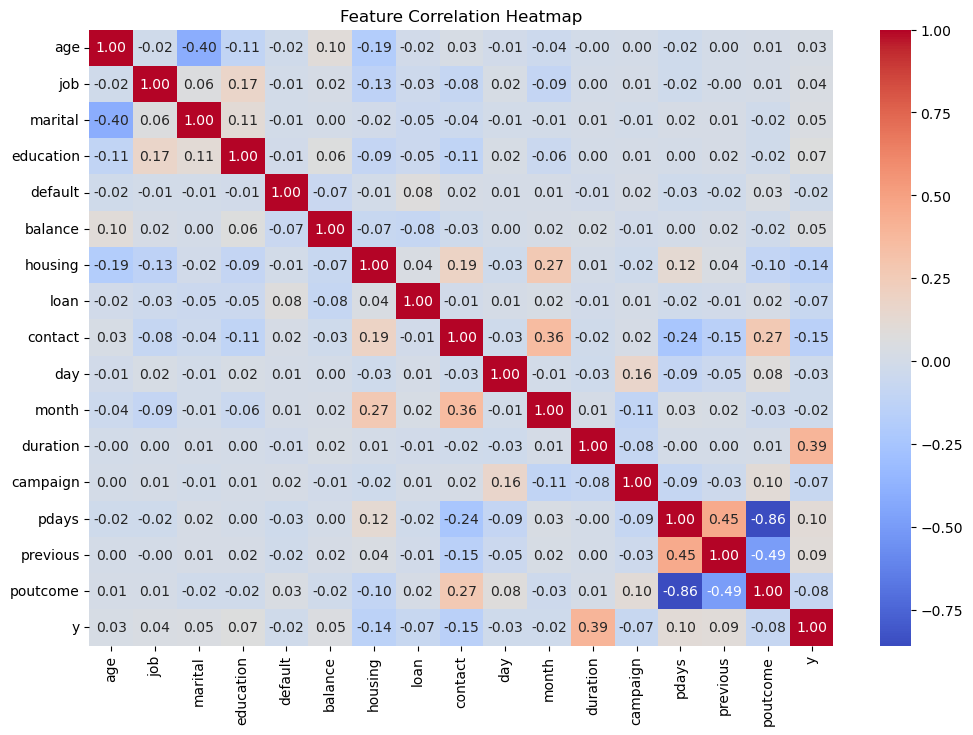

In [6]:
# Feature correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(data.drop(columns=['y']))
data['anomaly'] = outliers

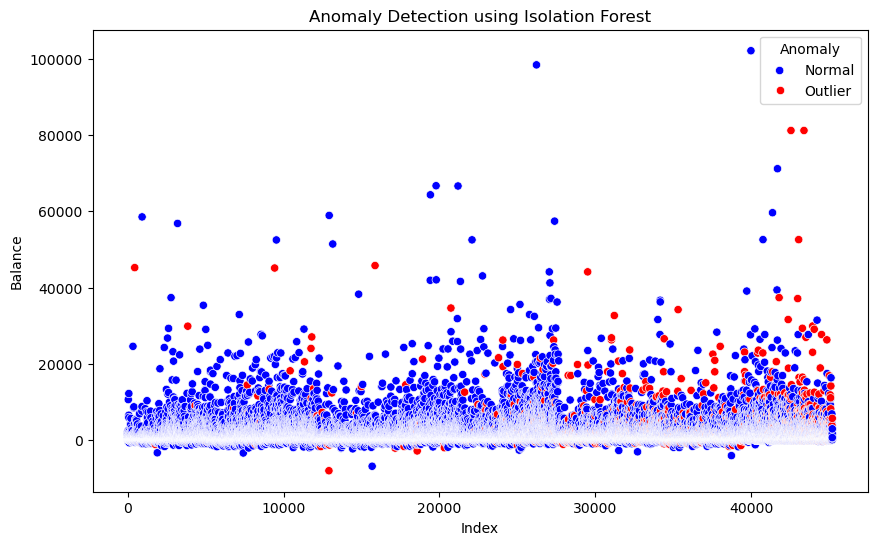

In [8]:
# Visualizing anomaly detection
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.index, y=data['balance'], hue=data['anomaly'], palette={1:'blue', -1:'red'})
plt.title("Anomaly Detection using Isolation Forest")
plt.xlabel("Index")
plt.ylabel("Balance")
plt.legend(title="Anomaly", labels=["Normal", "Outlier"])
plt.show()

In [9]:
# Removing anomalies
data = data[data['anomaly'] == 1].drop(columns=['anomaly'])


In [10]:
# Split data into features and target
X = data.drop(columns=['y'])
y = data['y']

# Standardizing the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7627
           1       0.64      0.40      0.49       963

    accuracy                           0.91      8590
   macro avg       0.78      0.69      0.72      8590
weighted avg       0.90      0.91      0.90      8590



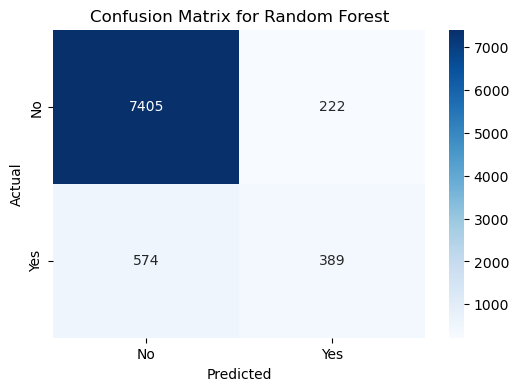


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7627
           1       0.60      0.21      0.31       963

    accuracy                           0.90      8590
   macro avg       0.75      0.60      0.63      8590
weighted avg       0.87      0.90      0.87      8590



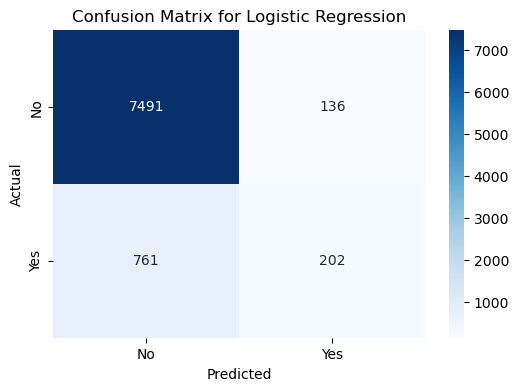


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7627
           1       0.46      0.48      0.47       963

    accuracy                           0.88      8590
   macro avg       0.70      0.71      0.70      8590
weighted avg       0.88      0.88      0.88      8590



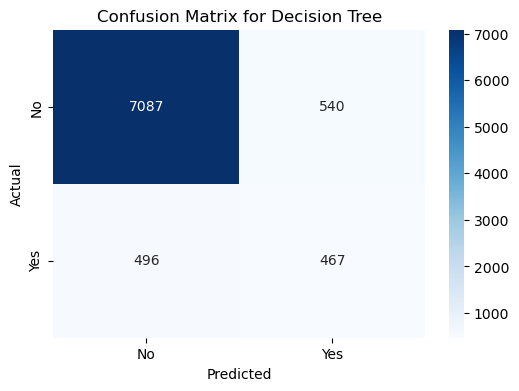

In [11]:
# Train models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results.append([name, accuracy])
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

  # Confusion matrix plot using Seaborn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy'])



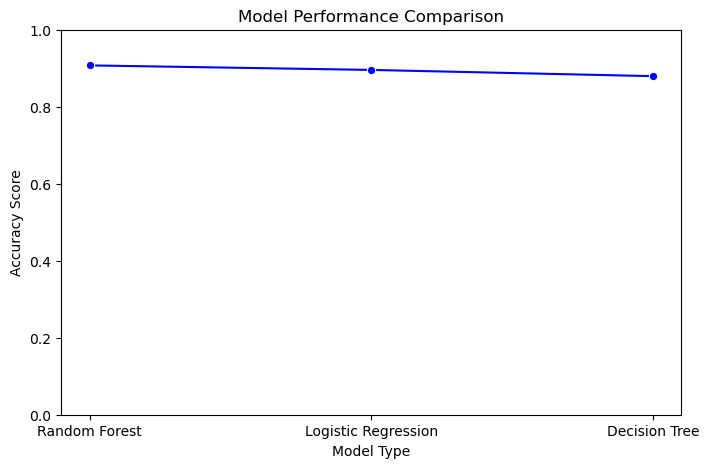

In [12]:
# Performance comparison using line plot
plt.figure(figsize=(8,5))
sns.lineplot(x='Model', y='Accuracy', data=results_df, marker='o', linestyle='-', color='b')
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.xlabel("Model Type")
plt.ylabel("Accuracy Score")
plt.show()


In [13]:
# Streamlit interface
st.title("Model Performance Comparison")
st.write("Comparison of classification models for predicting term deposit subscription")
st.dataframe(results_df)


2025-02-20 17:22:07.413 
  command:

    streamlit run C:\Users\LAdmin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()